# Минипроект 2

### Описание данных

#### user_data:


client – идентификатор пользователя

premium – является ли клиент премиальным

age – возраст


#### logs:


client – идентификатор пользователя

success – результат (успех – 1, нет – 0)

platform – платформа

time – время в формате Unix

### Задание 1
Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, посмотрите на описательную статистику. 

Вопрос: Сколько уникальных значений принимает переменная platform?

In [1]:
import pandas as pd

In [2]:
user_data = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/user_data.csv')

In [4]:
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [6]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [7]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [3]:
logs = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/logs.csv')

In [8]:
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [9]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [10]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [11]:
logs.platform.nunique()

3

Переменная platform принимает 3 уникальных значения

### Задание 2
Какой клиент совершил больше всего успешных операций?

Если несколько пользователей совершили одинаковое число успешных действий, перечислите их идентификаторы (client) через запятую и пробел в порядке возрастания. Например:

12, 123, 456

In [24]:
logs.query('success == True') \
    .groupby('client', as_index = False) \
    .agg({'success': 'count'}) \
    .rename(columns = {'success': 'success_orders_count'}) \
    .sort_values('success_orders_count') \
    .query('success_orders_count == 41') \
    .sort_values('client')['client'].values

array([12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584])

### Задание 3
С какой платформы было совершено наибольшее количество успешных операций?

In [26]:
logs.query('success == True').platform.value_counts()

phone       2019
computer    1090
tablet       180
Name: platform, dtype: int64

С платформы phone совершено наибольшее количество успешных операций

### Задание 4
Какая платформа наиболее популярна среди премиумных клиентов?

In [28]:
data = user_data.merge(logs, on = 'client')

In [29]:
data

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [30]:
data.query('premium == True').platform.value_counts()

phone       246
computer    150
tablet       24
Name: platform, dtype: int64

Среди премиумных клиентов наиболее популярна платформа phone

### Задание 5
Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет), используя библиотеку seaborn с параметрами цвета по умолчанию. Какой график получится в результате?

Используйте датасет, который вы получили на предыдущем шаге.

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

/Users/ola/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ola/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


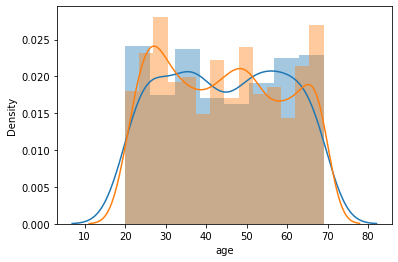

In [43]:
sns.distplot(data.query('premium == True').age)
sns.distplot(data.query('premium == False').age);

### Задание 6
Постройте график распределения числа успешных операций: 

x – число успешных операций

y – число клиентов, совершивших такое количество успешных операций

In [49]:
sc_operatios = data.query('success == True') \
                    .groupby('client', as_index = False) \
                    .agg({'success': 'count'}) \
                    .rename(columns = {'success': 'operations_count'})

In [50]:
sc_operatios

,client,operations_count
0,40,1
1,75,1
2,81,1
3,132,1
4,164,1
...,...,...
2099,99908,1
2100,99926,1
2101,99927,1
2102,99931,1


/Users/ola/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='operations_count', ylabel='Density'>

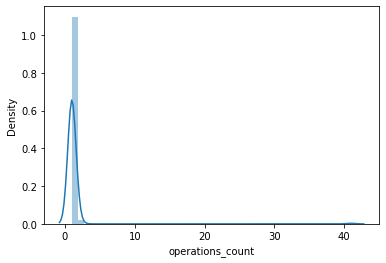

In [52]:
sns.distplot(sc_operatios.operations_count)

Можно сделать некоторые наблюдения:

Бóльшая часть наблюдений сосредоточена в левой части графика
    
Несколько клиентов совершили более 40 успешных действий

### Задание 7

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, по оси y – число успешных операций. Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки. 

Полезные ссылки:

sns.countplot – документация к типу графика

figsize – про размер графиков


Вопрос: Клиенты какого возраста совершили наибольшее количество успешных действий?



In [57]:
sc_computer = data.query('platform == "computer" and success == True')

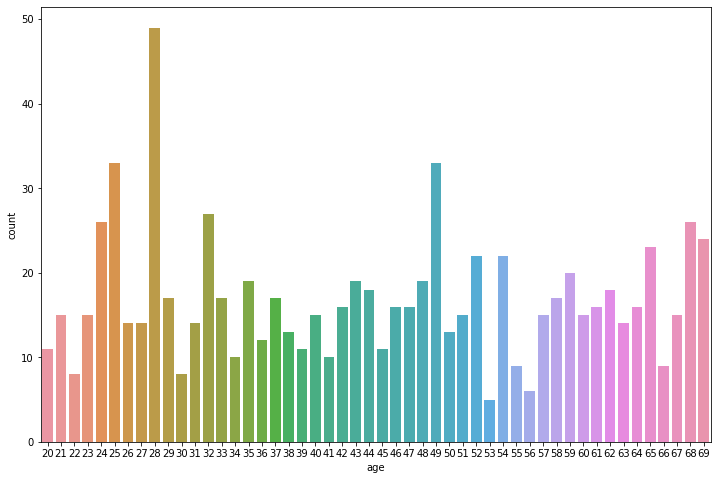

In [59]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x = "age", data = sc_computer)

Клиенты возраста 28 лет совершили наибольшее чисо успешных операций с компьютера